## Word Frequency

In [1]:
import string
import numpy as np
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import operator

Load text file. Data from Project Gutenberg (https://www.gutenberg.org/).

In [2]:
txt = open("ulysses.txt","r")

Remove punctuations in text.

In [3]:
remove = dict.fromkeys(map(ord, string.punctuation))

Collapse tokens to lower case.

In [4]:
txt = txt.read().translate(remove).lower()

Construct a dictionary where `key` = word, `value` = count (or frequency).

In [5]:
wordfreq = {}
for word in txt.split():
    if word not in wordfreq:
        wordfreq[word] = 1
    else:
        wordfreq[word] += 1

Construct an array of sorted word frequency of all words, and a separate array of word lengths.

In [6]:
sorted_by_word_frequency = sorted(wordfreq.items(), key=operator.itemgetter(1), reverse=True) # 2.4.1.5 in the python book
word_frequencies = np.asarray([f[1] for f in sorted_by_word_frequency])
word_lengths = np.asarray([len(f[0]) for f in sorted_by_word_frequency])
words = np.asarray([f[0] for f in sorted_by_word_frequency])

Construct an array of ranks from on the sorted frequency array using ordinal ranking

In [7]:
word_ranks = np.asarray([i+1 for i in range(len(word_frequencies))])

Print the most frequent 20 words and their frequencies.

In [8]:
for i in range(20):
    print("Rank: ", word_ranks[i], " Frequency: ", word_frequencies[i], " Word: ", sorted_by_word_frequency[i][0])

Rank:  1  Frequency:  15010  Word:  the
Rank:  2  Frequency:  8250  Word:  of
Rank:  3  Frequency:  7216  Word:  and
Rank:  4  Frequency:  6512  Word:  a
Rank:  5  Frequency:  5031  Word:  to
Rank:  6  Frequency:  4974  Word:  in
Rank:  7  Frequency:  3998  Word:  he
Rank:  8  Frequency:  3327  Word:  his
Rank:  9  Frequency:  2586  Word:  that
Rank:  10  Frequency:  2557  Word:  with
Rank:  11  Frequency:  2553  Word:  i
Rank:  12  Frequency:  2351  Word:  it
Rank:  13  Frequency:  2126  Word:  was
Rank:  14  Frequency:  2119  Word:  on
Rank:  15  Frequency:  1950  Word:  for
Rank:  16  Frequency:  1914  Word:  you
Rank:  17  Frequency:  1783  Word:  her
Rank:  18  Frequency:  1522  Word:  him
Rank:  19  Frequency:  1435  Word:  is
Rank:  20  Frequency:  1329  Word:  all


The slope of Log Frequency vs Log Ranking is:  -1.03


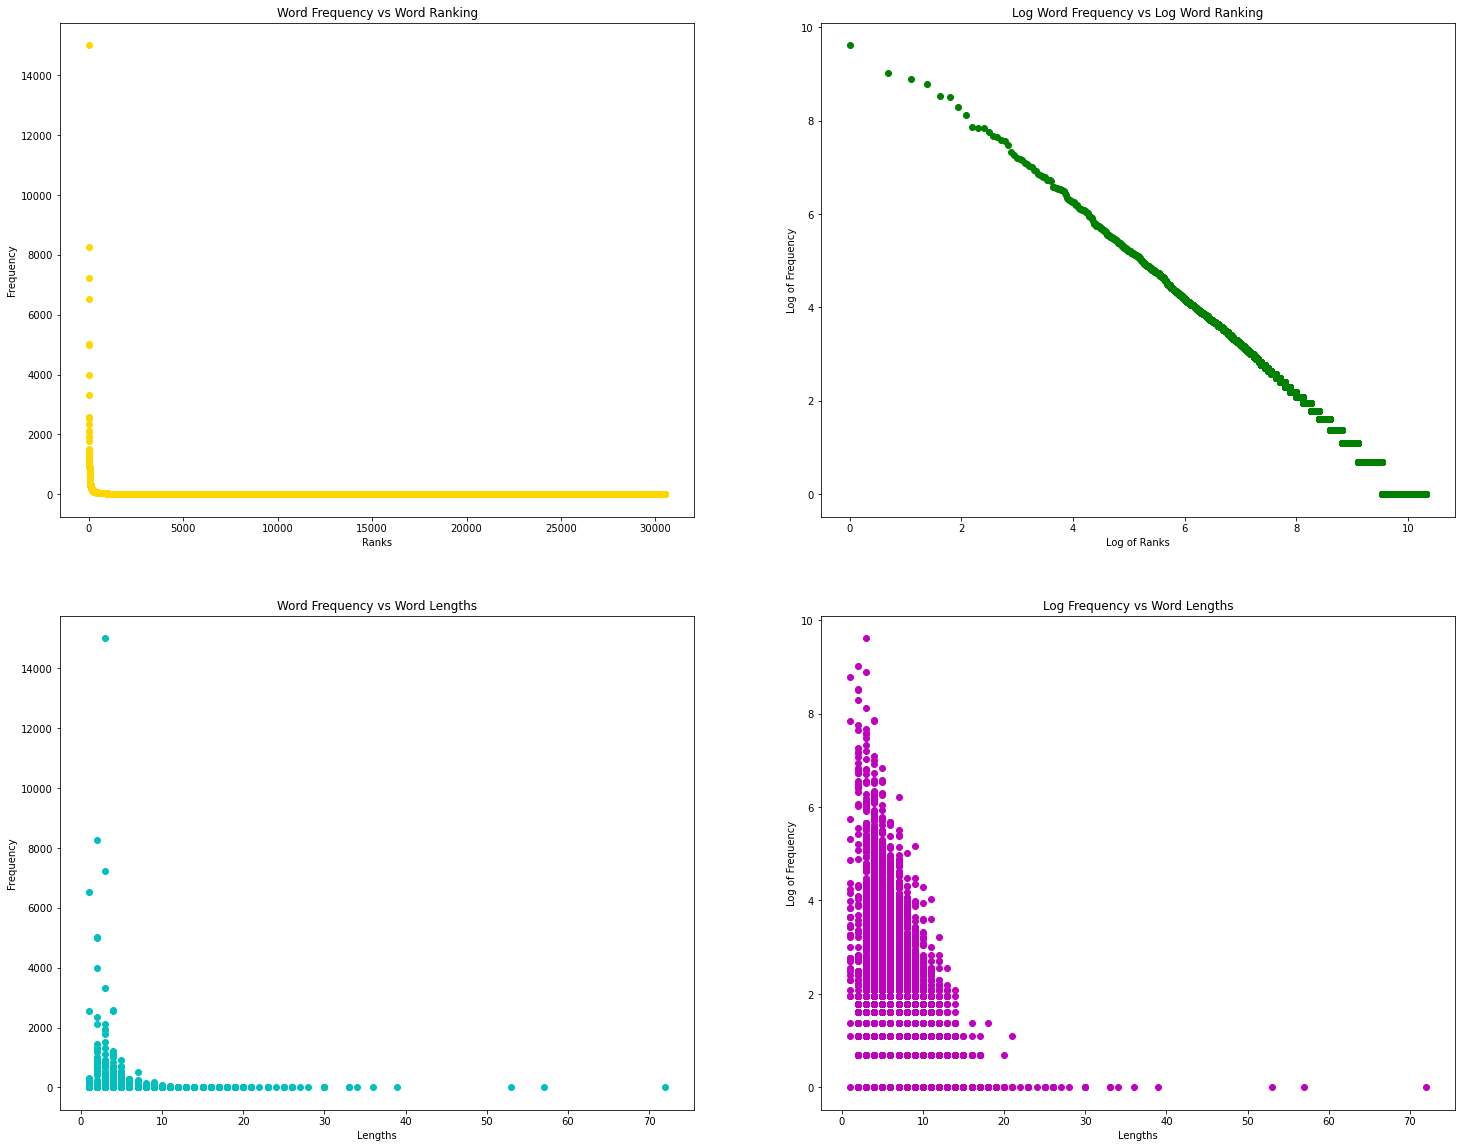

In [9]:
# visualizing some relationships
fig = plt.figure(figsize=(25, 20))
plt.subplot(2, 2, 1)
plt.scatter(word_ranks, word_frequencies, color='gold')
plt.title('Word Frequency vs Word Ranking')
plt.xlabel('Ranks')
plt.ylabel('Frequency')


log_freq = np.log(word_frequencies)
log_rank = np.log(word_ranks)
plt.subplot(2, 2, 2)
plt.scatter(log_rank, log_freq, color='g')
plt.title('Log Word Frequency vs Log Word Ranking')
plt.xlabel('Log of Ranks')
plt.ylabel('Log of Frequency')


# Linear regression
slope, intercept = np.polyfit(log_rank, log_freq, 1)
print("The slope of Log Frequency vs Log Ranking is: ", round(slope, 2))


plt.subplot(2, 2, 3)
plt.scatter(word_lengths, word_frequencies, color='c')
plt.title('Word Frequency vs Word Lengths')
plt.xlabel('Lengths')
plt.ylabel('Frequency')


plt.subplot(2, 2, 4)
plt.scatter(word_lengths, log_freq, color='m')
plt.title('Log Frequency vs Word Lengths')
plt.xlabel('Lengths')
plt.ylabel('Log of Frequency')

plt.show()

In [10]:
print("The Correlation between the Log Frequency and Word Length is: ", round(pearsonr(log_freq, word_lengths)[0],3))

The Correlation between the Log Frequency and Word Length is:  -0.311


Calculate and report the expected word length of English words based on the given data.

$E[len] = \sum^{i} len(i) * prob(i)$, where $prob(i)$ = normalized frequency of word $i$ (over all available words).

In [11]:
total_words = np.sum(word_frequencies) # add all the frequencies to get total number of words
word_probs = word_frequencies/total_words # probability is given by the frequency of a word divided by total number of words
expected_length = np.sum(word_lengths*word_probs) # multiply each word length by its probability, and sum over all words
print("The expected word length for an English word is: ", round(expected_length, 3))

The expected word length for an English word is:  4.485


Perform a shuffled (permutation) test with 1000 shuffled trials

In [12]:
n = 1000 # number of shuffled trials
expected_lengths_shuffled = np.zeros(n)# stores the expected length when word frequencies are shuffled
for i in range(n):
    word_probs_shuffled = np.random.permutation(word_probs) # shuffle the frequencies (i.e the probability) of each word to generate a null distribution
    expected_lengths_shuffled[i] += np.sum(word_lengths*word_probs_shuffled)

 Based on the shuffled trials, generate a histogram of the expected word lengths

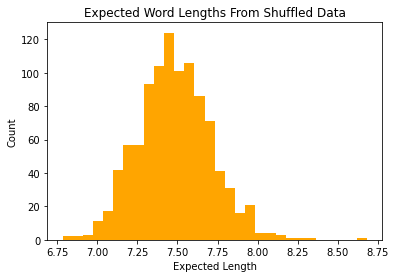

In [13]:
plt.hist(expected_lengths_shuffled, bins=30, color='orange')
plt.title('Expected Word Lengths From Shuffled Data')
plt.xlabel('Expected Length')
plt.ylabel('Count')
plt.show()

The null hypothesis is that the expected word length is no different from the expected length from shuffled data. 
Calculating the _p-value_ from the shuffled test:

In [14]:
# this is the probability that expected word length came from the null distribution.
p = len(np.where(expected_lengths_shuffled == expected_length)[0])/n 
print("The p-value is: ", p)

The p-value is:  0.0


Alternative ways of mapping words to frequencies and show that it produces a lower expected length than the empirical value

In [15]:
# From the 4th plot, we note that there are words in the text that are abnormally large. These can skew
# the expected word length considerably and so should be investigated and potentially removed.
# From the plot, we see that around length 20, the frequency of the words drops and so we can use this as a threshold value.

large_words = np.where(word_lengths > 20)[0] # indices of words lengths are greater than 20
print("Number suspicuous words: ", len(large_words))
print("The words with abnormally large lengths: \n", words[large_words]) # view the suspicious words

Number suspicuous words:  30
The words with abnormally large lengths: 
 ['stickumbrelladustcoat' 'contransmagnificandjewbangtantiality'
 'sudden—at—the—moment—though—from—lingering—illness—often—'
 'previously—expectorated—demise' 'theolologicophilolological'
 'rutlandbaconsouthamptonshakespeare' 'honorificabilitudinitatibus'
 'wavyavyeavyheavyeavyevyevyhair' 'schwanzenbadhodenthaler'
 'kratchinabritchisitch' 'hurhausdirektorpresident'
 'nationalgymnasiummuseumsanatoriumandsuspensoriumsordinaryprivatdocentgen'
 'eralhistoryspecialprofessordoctor' 'greatgreatgrandmothers'
 'dunducketymudcoloured' 'százharminczbrojúgulyásdugulás'
 'mangongwheeltracktrolleyglarejuggernaut' 'whorusalaminyourhighhohhhh'
 'exhibitionististicicity' 'bbbbblllllblblblblobschbg'
 'godblazeqrukbrukarchkrasht' 'weeshwashtkissinapooisthnapoohuck'
 'handsomemarriedwomanrubbedagainstwidebehindinclonskea'
 'dubedatandshedidbedad' 'helterskelterpelterwelter'
 'psychophysicotherapeutics' 'frseeeeeeeeeeeeeeeeeeeefrong'
 

In [16]:
# From the output, we can see that these 30 words are either gibberish, lack punctuation or are urls that were mistakenly 
# transcribed. Therefore, these words are not representative of regular English and so should be removed to prevent skewing
# the expected word length. 

# Similarly, there are strings that have non-alphabet characters which again skew the distribution towards higher word 
# lengths. As such, we can identify and exclude these strings, since English words MUST contain only characters from the 
# alphabet!

non_alpha_words = [not i.isalpha() for i in words]
print("The words containing non-alphabet characters: \n", [words[non_alpha_words][i] for i in range(20)]) # view the suspicious words

The words containing non-alphabet characters: 
 ['—i', '—the', '—yes', '—and', '1', '—what', '—o', '2', '—you', '—a', '5', '—well', '—he', '—that', '—no', '£', '—who', '3', '4', '—is']


In [17]:
# Find indices that exclude the aforementioned non-representative strings, leaving only the English ones.
valid_inds = [i for i in range(len(words)) if (word_lengths[i] <= 20 and words[i].isalpha()) ]
valid_freqs = word_frequencies[valid_inds] # frequencies that are valid
valid_lengths = word_lengths[valid_inds] # word lengths that are valid
valid_ranks = word_ranks[valid_inds] # ranks that are valid
valid_words = words[valid_inds]

valid_total_words = np.sum(valid_freqs) # get total number of valid words
valid_word_probs = word_frequencies/valid_total_words # store each valid probability
valid_expected_length = np.sum(valid_lengths*word_probs[valid_inds])
print("The valid expected word length for an English word is: ", round(valid_expected_length, 3))
print("The difference between the expected length and valid length is: ", round(expected_length - valid_expected_length, 3))

The valid expected word length for an English word is:  4.433
The difference between the expected length and valid length is:  0.053


In [18]:
for i in range(20):
    print("Rank: ", valid_ranks[i], " Frequency: ", valid_freqs[i], " Word: ", valid_words[i])

Rank:  1  Frequency:  15010  Word:  the
Rank:  2  Frequency:  8250  Word:  of
Rank:  3  Frequency:  7216  Word:  and
Rank:  4  Frequency:  6512  Word:  a
Rank:  5  Frequency:  5031  Word:  to
Rank:  6  Frequency:  4974  Word:  in
Rank:  7  Frequency:  3998  Word:  he
Rank:  8  Frequency:  3327  Word:  his
Rank:  9  Frequency:  2586  Word:  that
Rank:  10  Frequency:  2557  Word:  with
Rank:  11  Frequency:  2553  Word:  i
Rank:  12  Frequency:  2351  Word:  it
Rank:  13  Frequency:  2126  Word:  was
Rank:  14  Frequency:  2119  Word:  on
Rank:  15  Frequency:  1950  Word:  for
Rank:  16  Frequency:  1914  Word:  you
Rank:  17  Frequency:  1783  Word:  her
Rank:  18  Frequency:  1522  Word:  him
Rank:  19  Frequency:  1435  Word:  is
Rank:  20  Frequency:  1329  Word:  all
